## Step-1: Understanding the dataset

In [4]:
import pandas as pd
df = pd.read_csv('breast-cancer.csv')
print(df.head()) 
print(df.info())  
print(df.describe()) 
missing_values = df.isna()
missing_values_summary = missing_values.sum()
print(missing_values_summary)


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [5]:
## Importing necessary libraries.
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier


## XGBoost

In [6]:
df = pd.read_csv('breast-cancer.csv')
X = df.drop('diagnosis', axis=1)
y = df['diagnosis'].map({'B': 0, 'M': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k = 10
selector = SelectKBest(score_func=chi2, k=k)
X_train_new = selector.fit_transform(X_train, y_train)
X_test_new = selector.transform(X_test)

xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_classifier.fit(X_train_new, y_train)

y_pred = xgb_classifier.predict(X_test_new)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy on the test set: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy on the test set: 94.74%
Precision: 0.95
Recall: 0.91
F1 Score: 0.93


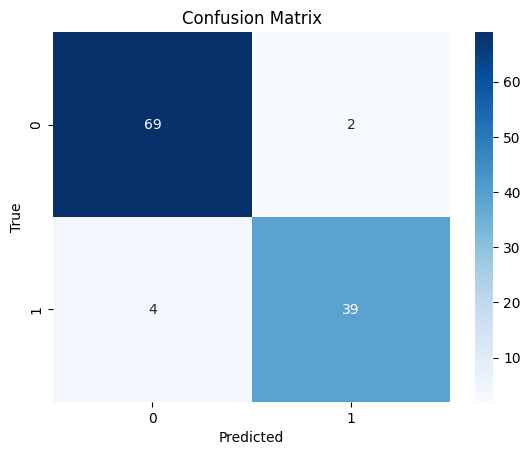

In [7]:

conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Random Forest

In [8]:

df = pd.read_csv('breast-cancer.csv')

X = df.drop('diagnosis', axis=1)
y = df['diagnosis'].map({'B': 0, 'M': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Random Forest Classifier Metrics:")
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Random Forest Classifier Metrics:
Accuracy on the test set: 96.49%
Precision: 0.98
Recall: 0.93
F1 Score: 0.95


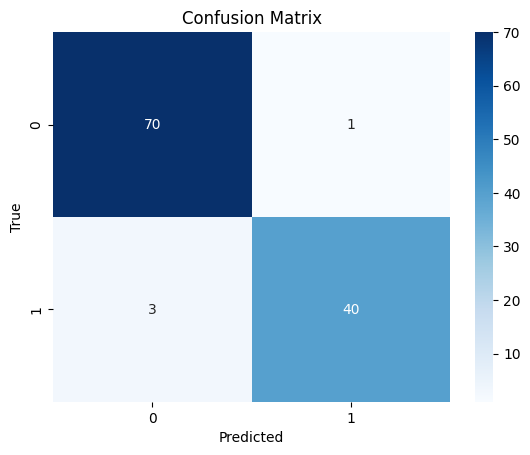

In [9]:

conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## MLP

C:\Users\Z1977139\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Accuracy: 97.37%
Precision: 0.95
Recall: 0.98
F1 Score: 0.97


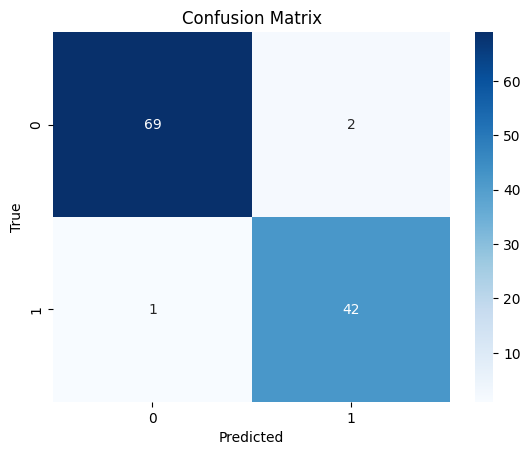

In [10]:

df = pd.read_csv('breast-cancer.csv') 

# Preprocess the data
X = df.drop('diagnosis', axis=1).values
y = df['diagnosis'].map({'B': 0, 'M': 1}).values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = MLPClassifier(hidden_layer_sizes=(64,), activation='relu', max_iter=20, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
                                            
f1 = f1_score(y_test, y_pred)

print(f'MLP Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## XGBoost Cross Validation 

Mean Accuracy (cross-validation): 93.15%
Standard Deviation of Accuracy: 0.0256


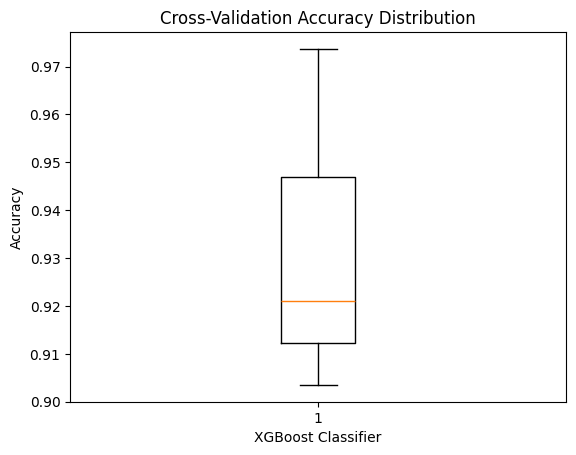

In [11]:

df = pd.read_csv('breast-cancer.csv') 

X = df.drop('diagnosis', axis=1)
y = df['diagnosis'].map({'B': 0, 'M': 1})

k = 10  
selector = SelectKBest(score_func=chi2, k=k)


X_new = selector.fit_transform(X, y)

xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)

cv_scores = cross_val_score(xgb_classifier, X_new, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='accuracy')

mean_accuracy = cv_scores.mean()
std_accuracy = cv_scores.std()

print(f"Mean Accuracy (cross-validation): {mean_accuracy * 100:.2f}%")
print(f"Standard Deviation of Accuracy: {std_accuracy:.4f}")

plt.boxplot(cv_scores)
plt.title('Cross-Validation Accuracy Distribution')
plt.xlabel('XGBoost Classifier')
plt.ylabel('Accuracy')
plt.show()


## Random Forest Cross validation 

Mean Accuracy (cross-validation) - Random Forest: 93.85%
Standard Deviation of Accuracy - Random Forest: 0.0235


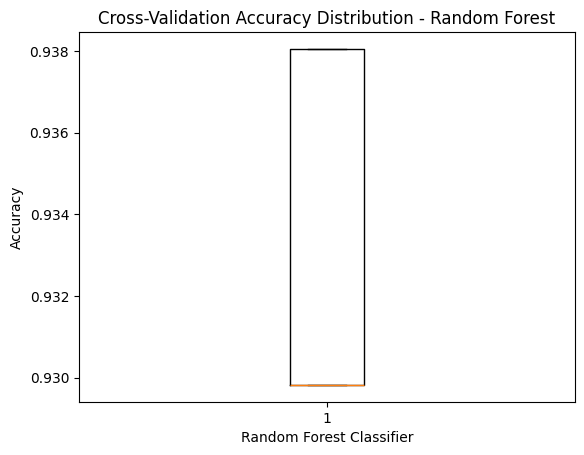

In [12]:

df = pd.read_csv('breast-cancer.csv')

X = df.drop('diagnosis', axis=1)
y = df['diagnosis'].map({'B': 0, 'M': 1})

k = 10  
selector = SelectKBest(score_func=chi2, k=k)

X_new = selector.fit_transform(X, y)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

cv_scores_rf = cross_val_score(rf_classifier, X_new, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='accuracy')

mean_accuracy_rf = cv_scores_rf.mean()
std_accuracy_rf = cv_scores_rf.std()

print(f"Mean Accuracy (cross-validation) - Random Forest: {mean_accuracy_rf * 100:.2f}%")
print(f"Standard Deviation of Accuracy - Random Forest: {std_accuracy_rf:.4f}")
plt.boxplot(cv_scores_rf, showfliers=False)
plt.title('Cross-Validation Accuracy Distribution - Random Forest')
plt.xlabel('Random Forest Classifier')
plt.ylabel('Accuracy')
plt.show()


## MLP Cross validation

In [13]:
df = pd.read_csv('breast-cancer.csv')

X = df.drop('diagnosis', axis=1)
y = df['diagnosis'].map({'B': 0, 'M': 1})

k = 10  
selector = SelectKBest(score_func=chi2, k=k)

X_new = selector.fit_transform(X, y)

mlp_classifier = MLPClassifier(hidden_layer_sizes=(64,), activation='relu', max_iter=20, random_state=42)
cv_scores = cross_val_score(mlp_classifier, X_new, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='accuracy')

mean_accuracy = cv_scores.mean()
std_accuracy = cv_scores.std()
print(f"Mean Accuracy (cross-validation): {mean_accuracy * 100:.2f}%")
print(f"Standard Deviation of Accuracy: {std_accuracy:.4f}")


Mean Accuracy (cross-validation): 37.26%
Standard Deviation of Accuracy: 0.0039


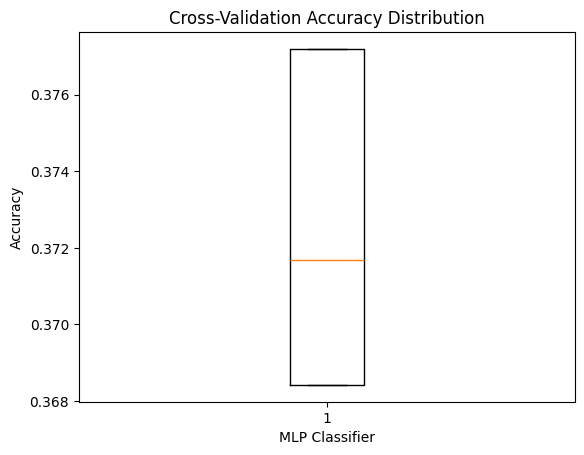

In [14]:
plt.boxplot(cv_scores)
plt.title('Cross-Validation Accuracy Distribution')
plt.xlabel('MLP Classifier')
plt.ylabel('Accuracy')
plt.show()

## Ensembling Technique

In [15]:

df = pd.read_csv('breast-cancer.csv')

X = df.drop('diagnosis', axis=1).values
y = df['diagnosis'].map({'B': 0, 'M': 1}).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
mlp_model = MLPClassifier(hidden_layer_sizes=(64,), activation='relu', max_iter=20, random_state=42)

ensemble_model = VotingClassifier(estimators=[
    ('random_forest', rf_model),
    ('mlp', mlp_model)
], voting='soft') 

ensemble_model.fit(X_train, y_train)

y_pred_ensemble = ensemble_model.predict(X_test)

accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f'Ensemble Model Accuracy: {accuracy_ensemble * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Ensemble Model Accuracy: 96.49%
Precision: 0.95
Recall: 0.98
F1 Score: 0.97


C:\Users\Z1977139\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


C:\Users\Z1977139\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Z1977139\AppData\Local\Temp\ipykernel_9368\2195799494.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classifiers, y=accuracies, palette='viridis')


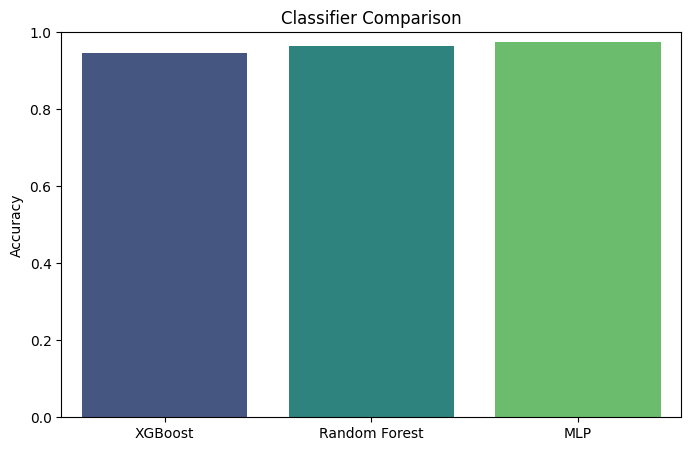

In [16]:

df = pd.read_csv('breast-cancer.csv')

X = df.drop('diagnosis', axis=1)
y = df['diagnosis'].map({'B': 0, 'M': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k = 10
selector = SelectKBest(score_func=chi2, k=k)
X_train_new = selector.fit_transform(X_train, y_train)
X_test_new = selector.transform(X_test)

xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_classifier.fit(X_train_new, y_train)


y_pred_xgb = xgb_classifier.predict(X_test_new)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
mlp_classifier = MLPClassifier(hidden_layer_sizes=(64,), activation='relu', max_iter=20, random_state=42)
mlp_classifier.fit(X_train_scaled, y_train)
y_pred_mlp = mlp_classifier.predict(X_test_scaled)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

classifiers = ['XGBoost', 'Random Forest', 'MLP']
accuracies = [accuracy_xgb, accuracy_rf, accuracy_mlp]

plt.figure(figsize=(8, 5))
sns.barplot(x=classifiers, y=accuracies, palette='viridis')
plt.title('Classifier Comparison')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()
